<a href="https://colab.research.google.com/github/nafi-rahman/ML-AI/blob/main/Pytorch_workflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch-workflow
* home: https://www.youtube.com/watch?v=V_xro1bcAuA&list=PLWKjhJtqVAblStefaz_YOVpDWqcRScc2s&ab_channel=freeCodeCamp.org
* git: https://github.com/mrdbourke/pytorch-deep-learning
* ref: https://www.learnpytorch.io/01_pytorch_workflow/
* discussion : https://github.com/mrdbourke/pytorch-deep-learning/discussions

## `prepare data -> build model -> fit -> infrence -> saving and loading model -> putting it together`

In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#check version
torch.__version__

'2.0.1+cu118'

#Data(preparing and loading)

in machine learning anything that you can convert to numbers can be considered as input data. data can be qualitative, normal , ordinal, quantative etc



##Creating new data with linear regression

linear regression `Y = a + bx` [x is explanatory and y is dependent]

In [2]:
#Create known parameters

w = 0.7
b = 0.3

#Create data
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)

Y = w * x + b
x[:10], Y[:10], len(x), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

###Splitting data into train and step

In [3]:
# Create train/test split

train = int(0.8 * len(x))
x_train, Y_train = x[:train], Y[:train]
x_test, Y_test = x[train:], Y[train:]

len(x_train), len(x_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

visualizing data

In [4]:
import matplotlib.pyplot as plt

def plot_predict(train_data=x_train,
                 train_label=Y_train,
                 test_data=x_test,
                 test_label=Y_test,
                 predic=None):
    """
    Plots training/test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data
    plt.scatter(train_data, train_label, c="b", s=4, label="Training Data")

    # Plot test data
    plt.scatter(test_data, test_label, c="g", s=4, label="Testing Data")

    # Plot predictions if available
    if predic is not None:
        plt.scatter(test_data, predic, c="r", s=4, label="Predictions")

    # Add labels and legend
    plt.xlabel("X-axis Label")
    plt.ylabel("Y-axis Label")
    plt.legend()

    # Show the plot
    plt.show()

# Example usage
# plot_predict(train_data=x_train, train_label=Y_train, test_data=x_test, test_label=Y_test, predic=predictions)


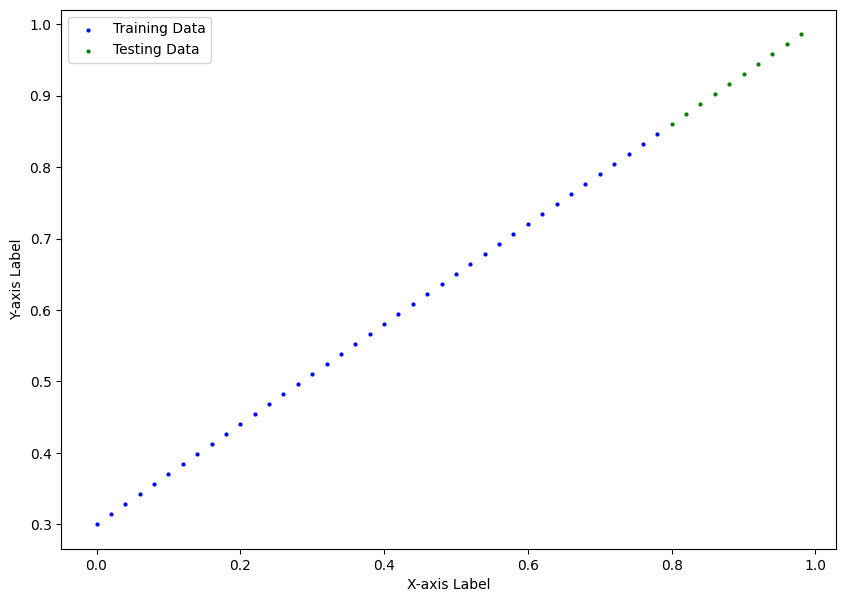

In [5]:
plot_predict()

## Build model
Creating a Linear Regression model

In [6]:
from torch import nn

#Create Linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))
#Forward method to define computation in model
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias


Torch model essentials - https://pytorch.org/tutorials/beginner/ptcheat.html (cheat sheet)
* torch.nn - contains the blocks and things needed to build a neural network
* torch.nn.parameter - initialives the model parameters
* torch.optim - model optimizers
* def forward() - All nn.Module subclasses require overwtiting the forward method



### checking the content of pytorch model
* cheecking model params using .parameters()


In [7]:
#create random seed
torch.manual_seed(42)

#create an instance of the module( a subclass of nn module)
model_0 = LinearRegressionModel()
#check out the paramaters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
#List named params
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

###making prediction using `torch.infrence_mode()`


In [9]:
with torch.inference_mode():
  y_pred = model_0(x_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

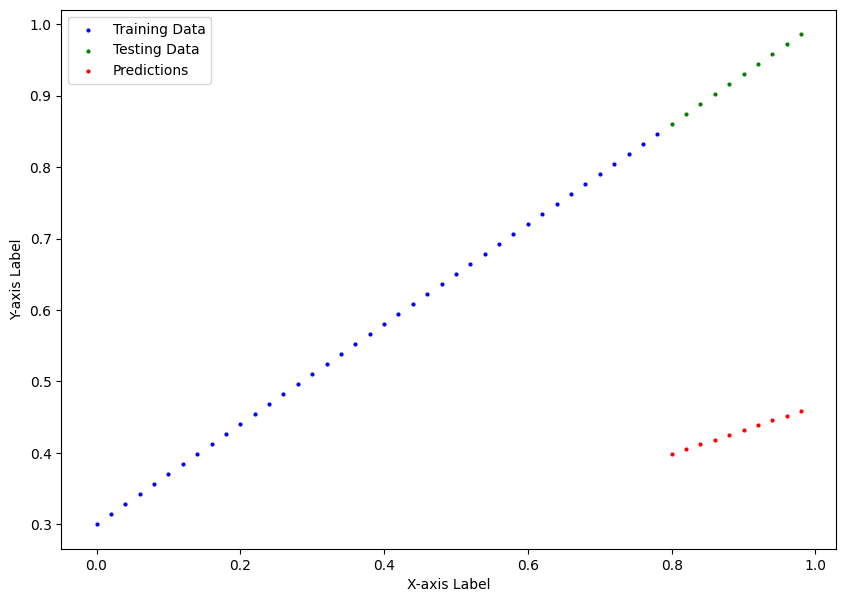

In [10]:
plot_predict(predic=y_pred)

## Trainaing the model


###Loss function and Optimizer

In [11]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
#setting up the loss func
loss_fn = torch.nn.L1Loss()
#stting up the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

###building a training/testing loop

things we need for a loop:
0. loop through the data
1. forward passs (data moving through the model's forward function)
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Loss Backwards (back propagation) - moves backward through the model / network to calculate the gradiants with respect to the loss
4. Optimizer step - (gradient descent) use the optimizer to adjust model params

In [13]:
torch.manual_seed(42)

#Epoch = a loop through the data (hyper param)
epochs = 200
#track vals
epoch_count = []
loss_val = []
test_loss_val = []
#TRAIN
# 0. looping through data
for epoch in range(epochs):
# set model to train mode
  model_0.train() #train in mode in pytorch sets require grads to true
#1. forward pass
  y_pred = model_0(x_train)
#2. Calculate the loss
  loss = loss_fn(y_pred,Y_train)
#3. optimizer zero grad
  optimizer.zero_grad()
#4. backpropagation on the loss with the params of model
  loss.backward()
#5. step the optimizer
  optimizer.step() #how the optimizer changes will accumilate through the loop so we have to 0 them for the next itter of loop

  #TEST
  model_0.eval() #turns off gradient tracking/drop out/batch norm
  with torch.inference_mode():
    #1. Do the forwad pass
    test_pred = model_0(x_test)
    #2. Calculate test loss
    test_loss = loss_fn(test_pred, Y_test)
    #print
    if epoch %10 ==0:
      epoch_count.append(epoch)
      loss_val.append(loss)
      test_loss_val.append(test_loss)
      print(f"Epoch: {epoch} | loss: {loss} | test loss: {test_loss}")




Epoch: 0 | loss: 0.31288138031959534 | test loss: 0.48106518387794495
Epoch: 10 | loss: 0.1976713240146637 | test loss: 0.3463551998138428
Epoch: 20 | loss: 0.08908725529909134 | test loss: 0.21729660034179688
Epoch: 30 | loss: 0.053148526698350906 | test loss: 0.14464017748832703
Epoch: 40 | loss: 0.04543796554207802 | test loss: 0.11360953003168106
Epoch: 50 | loss: 0.04167863354086876 | test loss: 0.09919948130846024
Epoch: 60 | loss: 0.03818932920694351 | test loss: 0.08886633068323135
Epoch: 70 | loss: 0.03476089984178543 | test loss: 0.0805937647819519
Epoch: 80 | loss: 0.03132382780313492 | test loss: 0.07232122868299484
Epoch: 90 | loss: 0.02788739837706089 | test loss: 0.06473556160926819
Epoch: 100 | loss: 0.024458957836031914 | test loss: 0.05646304413676262
Epoch: 110 | loss: 0.021020207554101944 | test loss: 0.04819049686193466
Epoch: 120 | loss: 0.01758546568453312 | test loss: 0.04060482233762741
Epoch: 130 | loss: 0.014155393466353416 | test loss: 0.03233227878808975
Ep

In [14]:
with torch.inference_mode():
  y_predN = model_0(x_test)

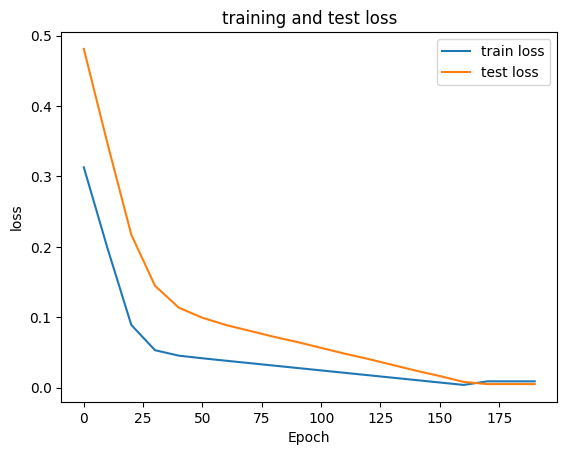

In [15]:
plt.plot(epoch_count, np.array(torch.tensor(loss_val).numpy()), label="train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_val).numpy()), label="test loss")
plt.title("training and test loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend()

##saving a model in pytorch

there are 3 main methods to save and load a model
1. `torch.save()`/`torch.load()` allows you to save/load the model in a pytorch pickle module
2. `torch.nn.Module.load_state_dict()` allows you to load a model's saved state dictionary

In [16]:
#saving
from pathlib import Path
# Create model directory
Model_path = Path("models")
Model_path.mkdir(parents=True, exist_ok=True)

#Create model save path
Model_name = "01_pytorch_workflow_model_0.pth"
Model_save_path = Model_path/Model_name

#save the model state dict
print(f"saving model to: {Model_save_path}")
torch.save(obj=model_0.state_dict(), f=Model_save_path)

saving model to: models/01_pytorch_workflow_model_0.pth


In [17]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Sep 17 12:19 01_pytorch_workflow_model_0.pth


In [22]:
#loading
#since it's saved as a state_dict instead of entire model
#we will make a new instance of model class and load the state dict into that

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(Model_save_path))

OrderedDict([('weight', tensor([0.2345])), ('bias', tensor([0.2303]))])


<All keys matched successfully>

In [33]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_pred = loaded_model_0(x_test)


In [34]:
model_0.eval()
with torch.inference_mode():
  y_pred = model_0(x_test)

In [35]:
y_pred == loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])